<a href="https://colab.research.google.com/github/AvelaAI/Myprofile/blob/main/causation_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

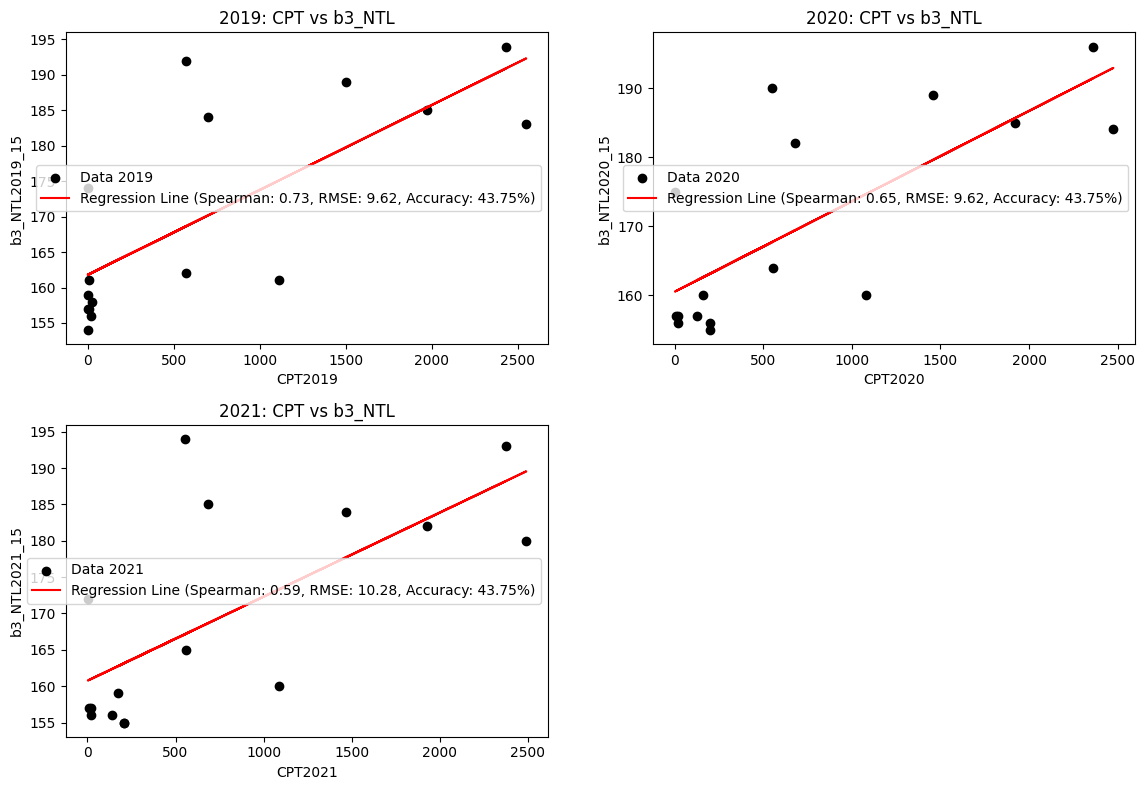

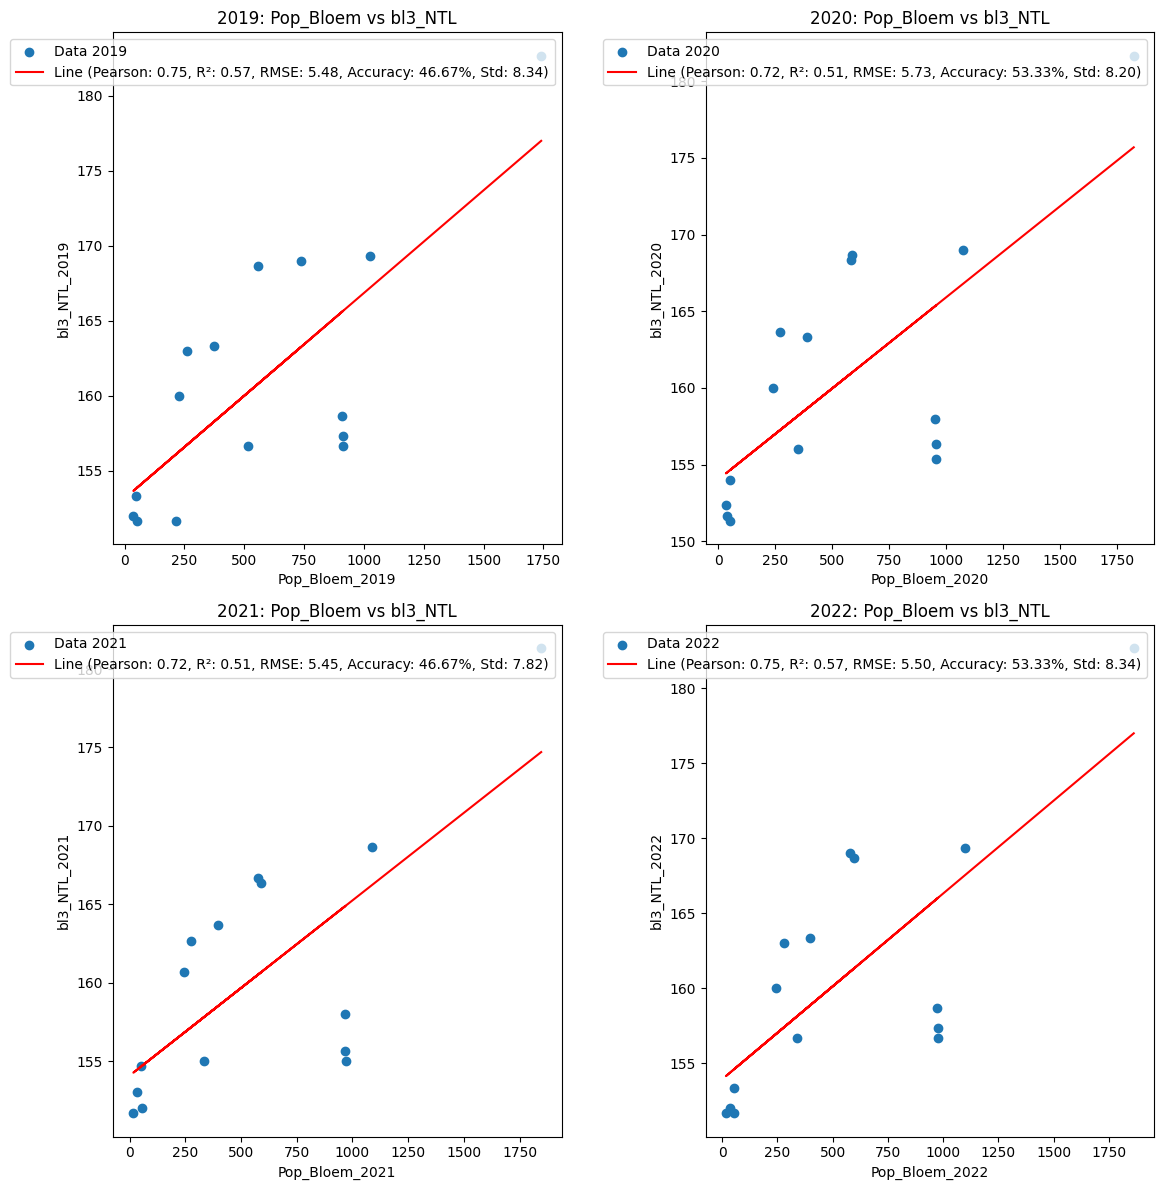

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr

# Data for 2019, 2020, and 2021
cpt2019 = [1976, 0, 700, 4, 574, 0, 569, 5, 1112, 2551, 2, 16, 22, -9999, 0, 2432, 1502]
b3_ntl2019 = [185, 159, 184, 157, 162, 157, 192, 161, 161, 183, 174, 156, 158, 156, 154, 194, 189]

cpt2020 = [1918, 9, 679, 124, 557, 198, 552, 160, 1079, 2476, 2, 21, 21, -9999, 198, 2360, 1457]
b3_ntl2020 = [185, 157, 182, 157, 164, 156, 190, 160, 160, 184, 175, 157, 156, 156, 155, 196, 189]

cpt2021 = [1930, 9, 684, 139, 561, 205, 556, 176, 1086, 2491, 2, 21, 21, -9999, 205, 2375, 1467]
b3_ntl2021 = [182, 157, 185, 156, 165, 155, 194, 159, 160, 180, 172, 157, 156, 155, 155, 193, 184]

# Function to remove missing data (-9999)
def clean_data(cpt_data, b3_ntl_data):
    valid_indices = [i for i, val in enumerate(cpt_data) if val != -9999]
    return np.array([cpt_data[i] for i in valid_indices]), np.array([b3_ntl_data[i] for i in valid_indices])

# Clean the data for each year
cpt2019_valid, b3_ntl2019_valid = clean_data(cpt2019, b3_ntl2019)
cpt2020_valid, b3_ntl2020_valid = clean_data(cpt2020, b3_ntl2020)
cpt2021_valid, b3_ntl2021_valid = clean_data(cpt2021, b3_ntl2021)

# Function to calculate accuracy
def calculate_accuracy(y_true, y_pred, tolerance=5):
    correct_predictions = np.sum(np.abs(y_true - y_pred) <= tolerance)
    accuracy = (correct_predictions / len(y_true)) * 100
    return accuracy

# Prepare figure
plt.figure(figsize=(12, 8))

# Plot for 2019
X_2019 = cpt2019_valid.reshape(-1, 1)
y_2019 = b3_ntl2019_valid
regressor_2019 = LinearRegression()
regressor_2019.fit(X_2019, y_2019)
y_pred_2019 = regressor_2019.predict(X_2019)
corr_2019, _ = spearmanr(cpt2019_valid, b3_ntl2019_valid)
rmse_2019 = np.sqrt(mean_squared_error(y_2019, y_pred_2019))
accuracy_2019 = calculate_accuracy(y_2019, y_pred_2019)

# Scatter plot for 2019 and regression line
plt.subplot(2, 2, 1)
plt.scatter(cpt2019_valid, b3_ntl2019_valid, color='black', label='Data 2019')
plt.plot(cpt2019_valid, y_pred_2019, color='red', label=f'Regression Line (Spearman: {corr_2019:.2f}, RMSE: {rmse_2019:.2f}, Accuracy: {accuracy_2019:.2f}%)')
plt.title('2019: CPT vs b3_NTL')
plt.xlabel('CPT2019')
plt.ylabel('b3_NTL2019_15')
plt.legend()

# Plot for 2020
X_2020 = cpt2020_valid.reshape(-1, 1)
y_2020 = b3_ntl2020_valid
regressor_2020 = LinearRegression()
regressor_2020.fit(X_2020, y_2020)
y_pred_2020 = regressor_2020.predict(X_2020)
corr_2020, _ = spearmanr(cpt2020_valid, b3_ntl2020_valid)
rmse_2020 = np.sqrt(mean_squared_error(y_2020, y_pred_2020))
accuracy_2020 = calculate_accuracy(y_2020, y_pred_2020)

# Scatter plot for 2020 and regression line
plt.subplot(2, 2, 2)
plt.scatter(cpt2020_valid, b3_ntl2020_valid, color='black', label='Data 2020')
plt.plot(cpt2020_valid, y_pred_2020, color='red', label=f'Regression Line (Spearman: {corr_2020:.2f}, RMSE: {rmse_2020:.2f}, Accuracy: {accuracy_2020:.2f}%)')
plt.title('2020: CPT vs b3_NTL')
plt.xlabel('CPT2020')
plt.ylabel('b3_NTL2020_15')
plt.legend()

# Plot for 2021
X_2021 = cpt2021_valid.reshape(-1, 1)
y_2021 = b3_ntl2021_valid
regressor_2021 = LinearRegression()
regressor_2021.fit(X_2021, y_2021)
y_pred_2021 = regressor_2021.predict(X_2021)
corr_2021, _ = spearmanr(cpt2021_valid, b3_ntl2021_valid)
rmse_2021 = np.sqrt(mean_squared_error(y_2021, y_pred_2021))
accuracy_2021 = calculate_accuracy(y_2021, y_pred_2021)

# Scatter plot for 2021 and regression line
plt.subplot(2, 2, 3)
plt.scatter(cpt2021_valid, b3_ntl2021_valid, color='black', label='Data 2021')
plt.plot(cpt2021_valid, y_pred_2021, color='red', label=f'Regression Line (Spearman: {corr_2021:.2f}, RMSE: {rmse_2021:.2f}, Accuracy: {accuracy_2021:.2f}%)')
plt.title('2021: CPT vs b3_NTL')
plt.xlabel('CPT2021')
plt.ylabel('b3_NTL2021_15')
plt.legend()

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


